### List of all the packages we will use in this tutorial
* ggplot2 the star of the show
* ggpubr for showing multiple plots simultaneously
* gganimate for when we want to animate our figures
    * gifski is an additional package to enable rendering of our gifs
* scales to make our labels in our plots look nicer
* rgdal for loading in shapefiles to make our spatial plots
* dplyr for working with the data through pipelines, mutations, and summarization

In [1]:
### if you need to install anything
# install.packages("", repo = "https://cloud.r-project.org/")

In [2]:
### These are all the packages we must call up
library(ggplot2) # for plotting
library(ggpubr) # for showing multiple plots simultaneously
library(gganimate) # for animating our figures
library(scales) # for changing numbers from 6e6 to 6,000,000
library(rgdal) # for loading in spatial data
library(dplyr) # for working with data

Registered S3 methods overwritten by 'ggplot2':
  method         from 
  [.quosures     rlang
  c.quosures     rlang
  print.quosures rlang
Warning message:
"package 'ggpubr' was built under R version 3.6.3"Warning message:
"package 'gganimate' was built under R version 3.6.3"Warning message:
"package 'scales' was built under R version 3.6.3"Warning message:
"package 'rgdal' was built under R version 3.6.3"Loading required package: sp
Warning message:
"package 'sp' was built under R version 3.6.3"rgdal: version: 1.5-10, (SVN revision 1006)
Geospatial Data Abstraction Library extensions to R successfully loaded
Loaded GDAL runtime: GDAL 3.0.4, released 2020/01/28
Path to GDAL shared files: C:/Users/Jason/Documents/R/win-library/3.6/rgdal/gdal
GDAL binary built with GEOS: TRUE 
Loaded PROJ runtime: Rel. 6.3.1, February 10th, 2020, [PJ_VERSION: 631]
Path to PROJ shared files: C:/Users/Jason/Documents/R/win-library/3.6/rgdal/proj
Linking to sp version:1.4-2
To mute warnings of possible GDA

## Time for plotting

We begin this portion by reading in the datasets that combine COVID and ACS data. These are the data frames that are created with the code used above. We will cover important aspects of scatter, line, box, bar, histogram, and density plots. These are typically the plots you start with to do a preliminary analysis of your data. Of course, there are other types of plots that can be created using ggplot2. The concepts presented in the following code can be applied to plots not listed here.

In [21]:
setwd("G:/My Drive/Desktop Laptop Shared Files/ggplot2 seminar/data_files/processed_data")
covid_bystate = read.csv("covid_bystate.csv")
covid_bystate_bymonth = read.csv("covid_bystate_bymonth.csv")
covid_usa = read.csv("covid_usa.csv")

#### Scatter Plots

One of the more simpler plots, scatter plots are used when you have continuous X and Y variables. For this example we will look at the most recent COVID cumulative tally of cases and deaths against some ACS variables.

* Data: covid_bystate
* Variables: percent_bachelors, cases_per_100000, top_half_edu

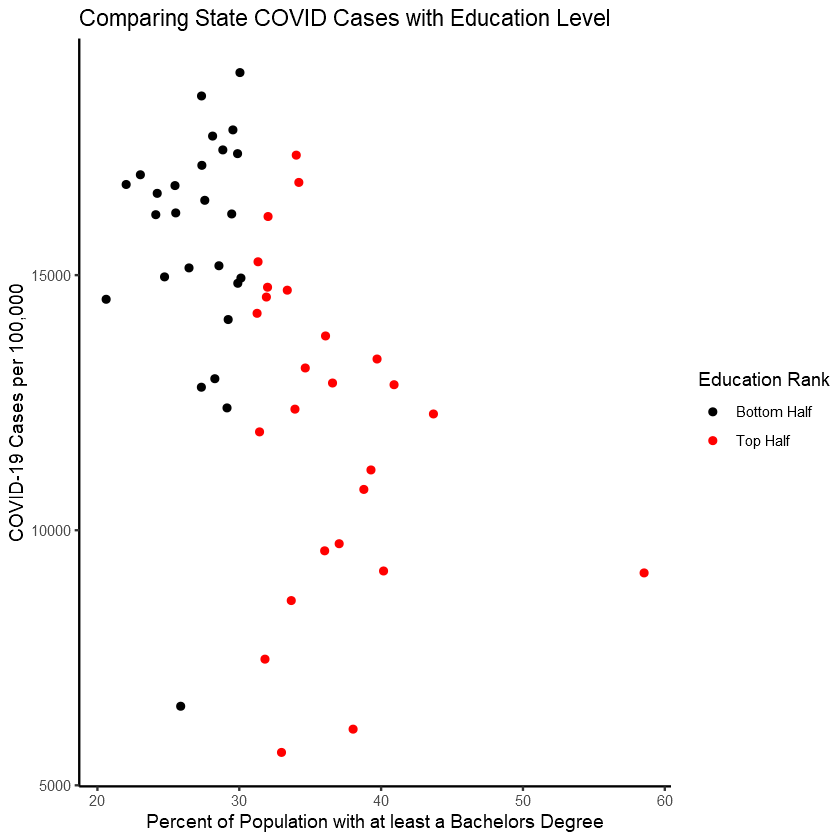

In [22]:
### cases vs percent of state population with at least a bachelor's degree
scatter_edu = 



#### Line Plots

Similar to the scatter plot, line plots are great when you have data organized into a series. In this example, we will be looking at total COVID cases in the United States through time.

* Data: covid_usa
* Variables: months_after_jan20, cases_total_nation

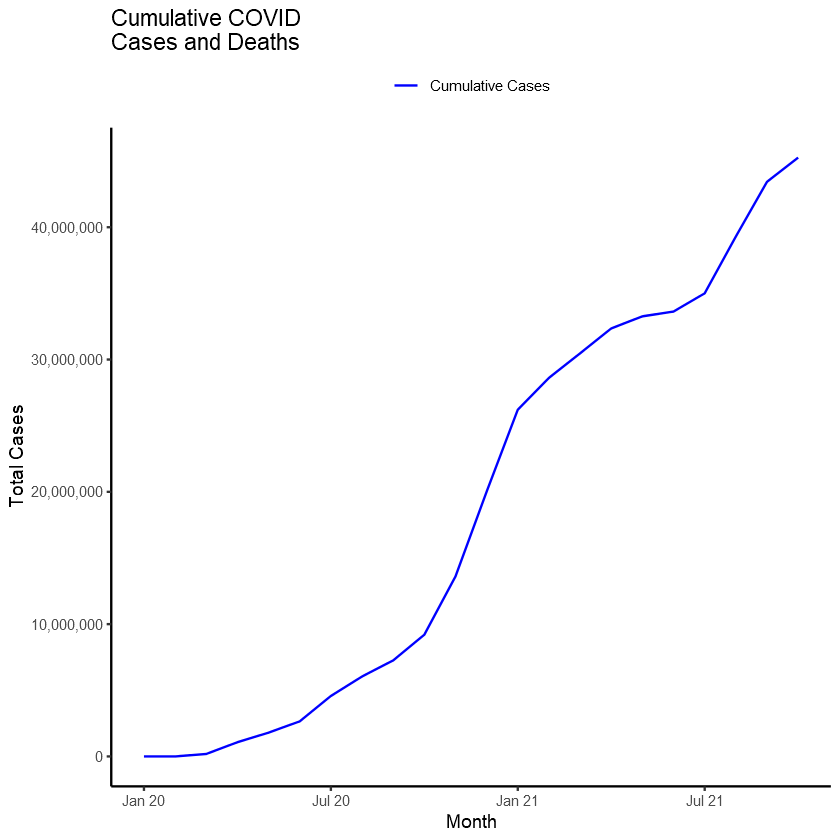

In [23]:
cases_over_time = 


#### Box (and Whiskers) Plots

With box plots, we are trying to visualize the distribution of data. The box in the box plot itself shows three values: the 25th percentile, median, and 75th percentile. The Interquartile range (IQR) is the difference between the 75th and 25th percentiles. The "whiskers" of the plots are the 25th and 75th percentiles -/+ (1.5\*IQR), respectively. Points outside of the "whiskers" bounds are considered outliers.

* Data: covid_bystate
* Variables: cases_per_100000, top_half_edu

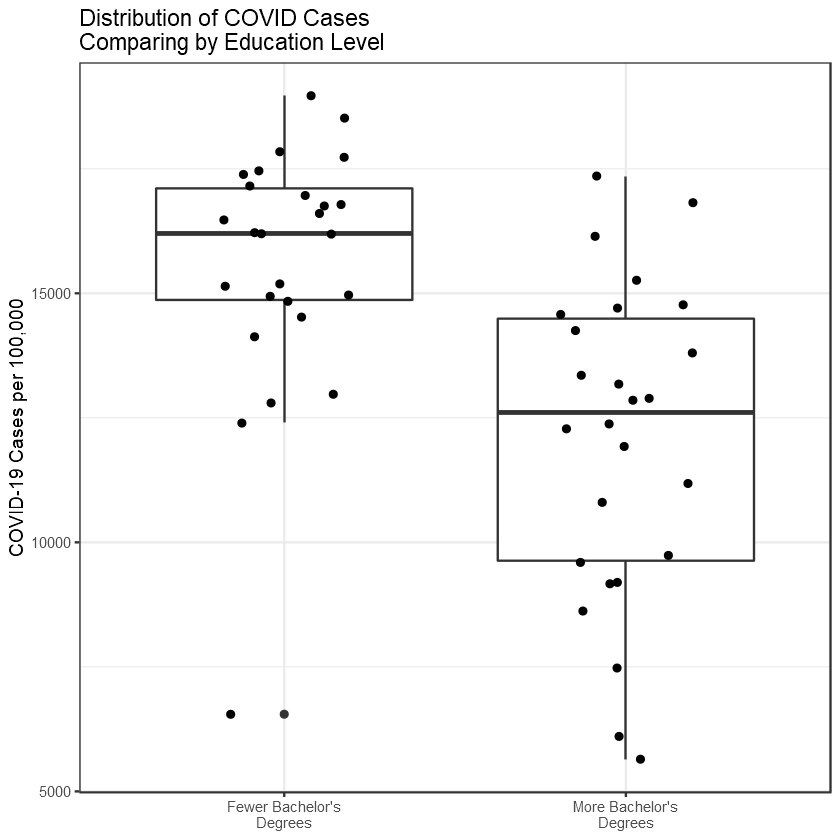

In [24]:
box_edu = 


#### Bar plots

Bar plots are for when we want to visualize differences between discrete cases. In our analysis, we are trying to see differences between states whose share of population with at least a Bachelor's degree are in the top half against those who are in the bottom half. We will use the average cases per 100,000 people to compare them. We will also find the standard deviation and plot it to quickly see if they really are that different from each other.

* Data: covid_bystate, covid_bystate_summarized
* Variables: cases_per_100000, average_cases_per_100000, sd_cases_per_100000

In [25]:
### the data summarization for showing the first way
### in this way, we are defining the height of the bars
names(covid_bystate)
covid_bystate_summarized = 

covid_bystate_summarized

[1] "state_fips"          "state"               "cases"              
 [4] "deaths"              "pop_total"           "pop_white"          
 [7] "edu_total"           "edu_hs"              "edu_ged"            
[10] "edu_bachelors"       "edu_masters"         "edu_profschool"     
[13] "edu_phd"             "income_per_capita"   "pop_wo_healthcare"  
[16] "percent_minority"    "top_half_minority"   "percent_bachelors"  
[19] "top_half_edu"        "percent_healthcare"  "top_half_healthcare"
[22] "cases_per_100000"    "deaths_per_100000"

top_half_edu,average_cases_per_100000,sd_cases_per_100000
0,15603.12,2512.952
1,12079.31,3164.842


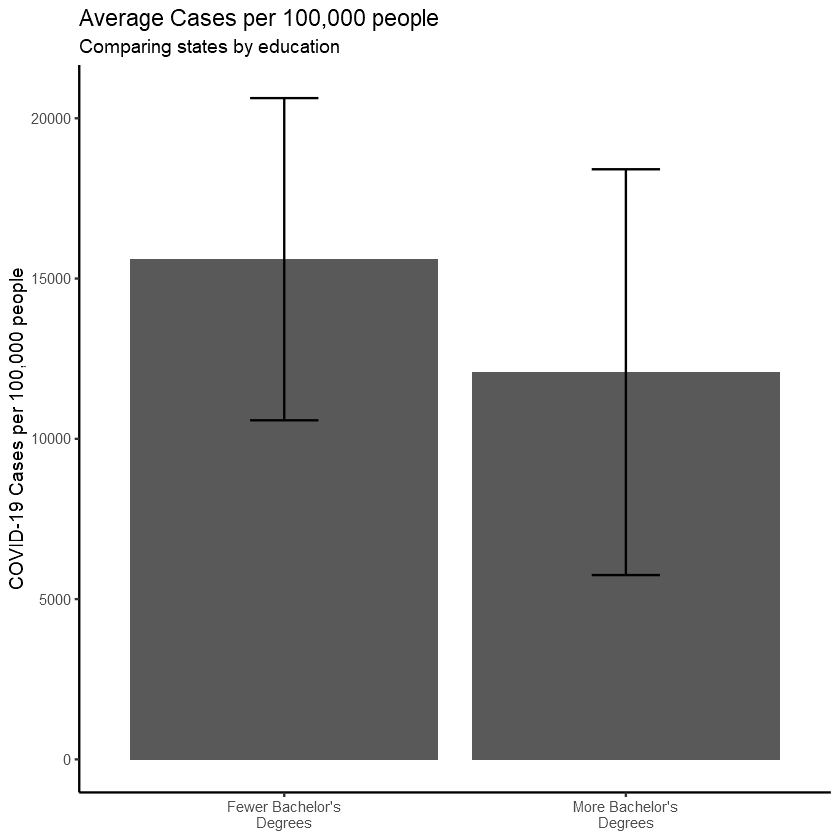

In [26]:
bar_edu = 


bar_edu

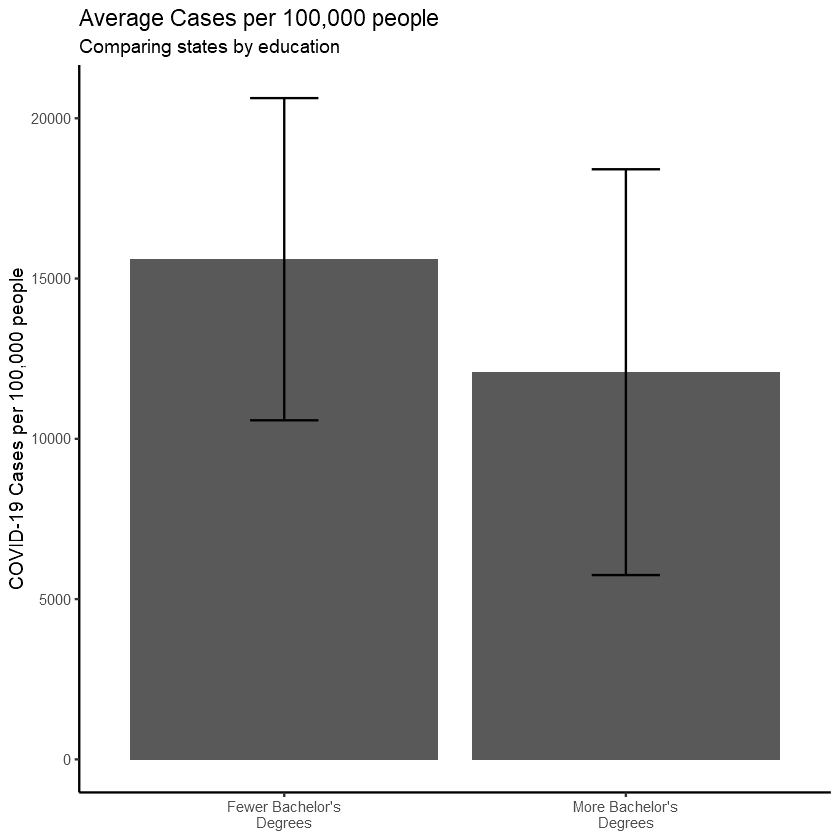

In [27]:
### equivalent to the top


#### Histograms

Rather than defining our own bar heights, histograms are meant to count the frequency of a discrete case. Now, we do not consider average number of cases per 100,000 people to be a discrete variable. However, what we can do is define discrete bins of values and see how many states appear in each bin. For histograms, changing the size of the binwidth is important. It helps define what your output will look like.

* Data: covid_bystate
* Variables: cases_per_100000

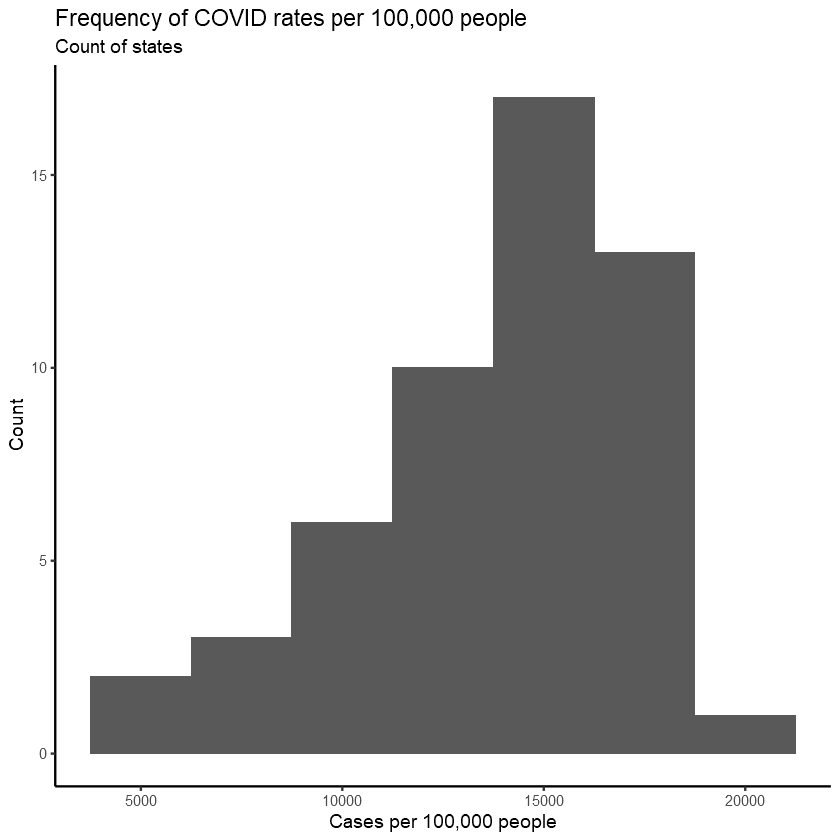

In [28]:
histogram_plot = 


#### Density plots

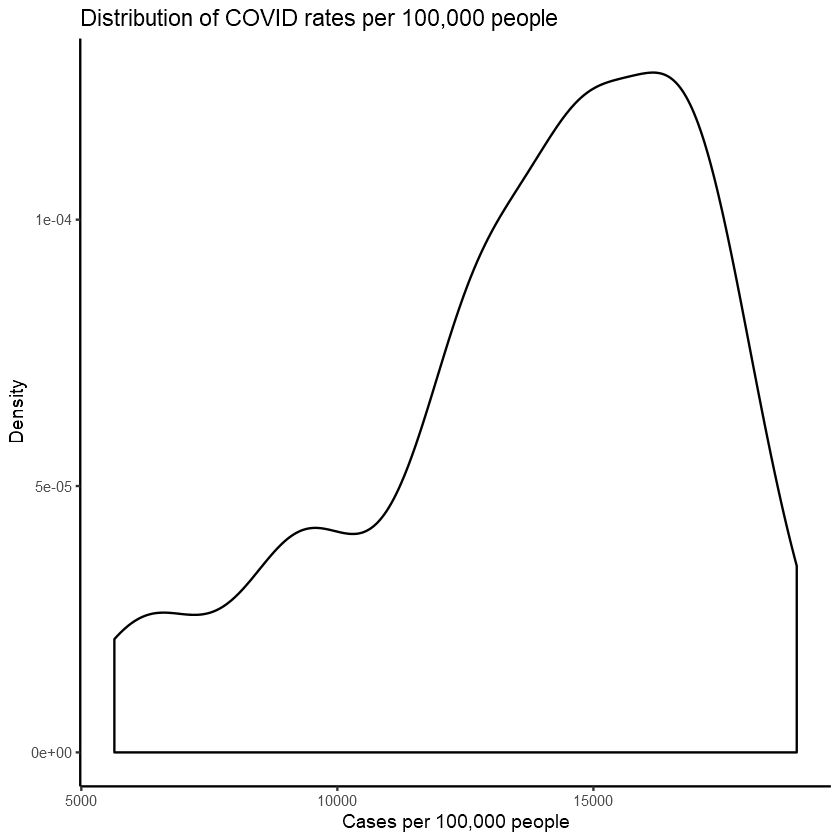

In [29]:
density_plot = 


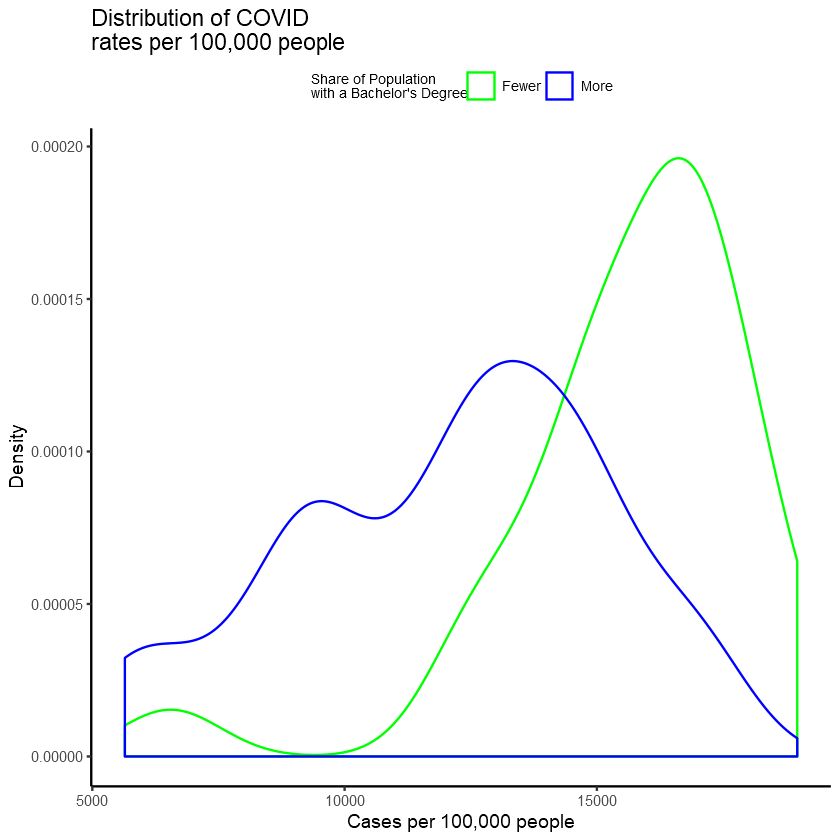

In [30]:
density_edu = 


#### Combing plots

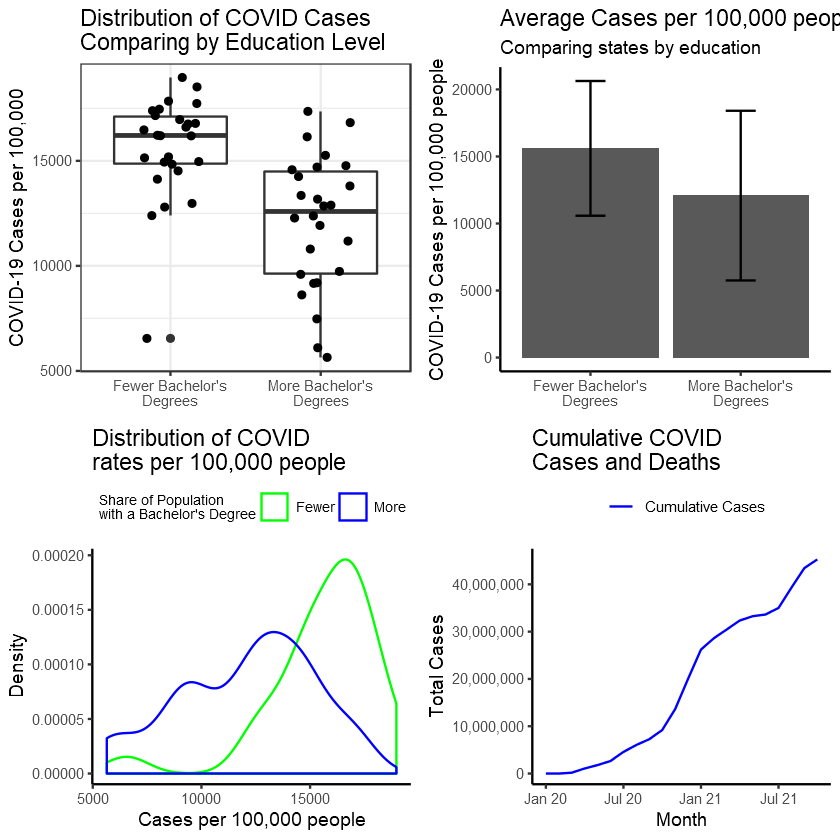

In [31]:
ggarrange(box_edu, bar_edu,
          density_edu, cases_over_time,
          ncol = 2, nrow = 2)

## Spatial plots

In [32]:
### set working directory to the folder containing shapefile and other supporting files
setwd("G:/My Drive/Desktop Laptop Shared Files/ggplot2 seminar/data_files/states_shp")
# dsn is for the "destination" folder
# by putting "." we are saying we want to look at the current working directory
states_spdf = readOGR(dsn = ".", layer = "states")

class(states_spdf)

OGR data source with driver: ESRI Shapefile 
Source: "G:\My Drive\Desktop Laptop Shared Files\ggplot2 seminar\data_files\states_shp", layer: "states"
with 51 features
It has 5 fields


[1] "SpatialPolygonsDataFrame"
attr(,"package")
[1] "sp"

<span style="color:red"><b>A note on the 'states_spdf' object</span>.</b>

We've just read in a Shapefile which is typically used to upload maps into GIS. We use the readOGR() function to read in the file and assign it to 'states_spdf.' Now, the class of the object is important. 'states_spdf' is a SpatialPolygonsDataFrame as indicated by the class() function (hence the 'spdf' at the end of the variable name). It has several 'slots' which contain more objects. To see the names of the slots we use the slotNames() function to view the objects within 'states_sp.' <br>
<br>
To access the slot, we use the '@' symbol just like we would use '$' with a data frame to reference a specific column. This is coded just after we use slotNames().

In [33]:
### see the slots in states_spdf
slotNames(states_spdf)

### accessing the slots
states_spdf_data = states_spdf@data
head(states_spdf_data)

### while we're at it, let's add those row.names as a column to be used later
### this is how we match the correct columns when we use the merge() function
states_spdf@data$id = row.names(states_spdf@data)
# head(states_spdf@data)

[1] "data"        "polygons"    "plotOrder"   "bbox"        "proj4string"

,STATE_NAME,DRAWSEQ,STATE_FIPS,SUB_REGION,STATE_ABBR
0,Washington,2,53,Pacific,WA
1,Montana,3,30,Mountain,MT
2,Maine,4,23,New England,ME
3,North Dakota,5,38,West North Central,ND
4,South Dakota,6,46,West North Central,SD
5,Wyoming,7,56,Mountain,WY


#### Merging our ACS and COVID data with the states data

While we're at it, lets merge all our data together.

In [34]:
states_spdf@data = merge(x = states_spdf@data, by.x = "STATE_FIPS", all.x = T,
                         y = covid_bystate, by.y = "state_fips", all.y = F)

names(states_spdf@data)
head(states_spdf@data)

[1] "STATE_FIPS"          "STATE_NAME"          "DRAWSEQ"            
 [4] "SUB_REGION"          "STATE_ABBR"          "id"                 
 [7] "state"               "cases"               "deaths"             
[10] "pop_total"           "pop_white"           "edu_total"          
[13] "edu_hs"              "edu_ged"             "edu_bachelors"      
[16] "edu_masters"         "edu_profschool"      "edu_phd"            
[19] "income_per_capita"   "pop_wo_healthcare"   "percent_minority"   
[22] "top_half_minority"   "percent_bachelors"   "top_half_edu"       
[25] "percent_healthcare"  "top_half_healthcare" "cases_per_100000"   
[28] "deaths_per_100000"

STATE_FIPS,STATE_NAME,DRAWSEQ,SUB_REGION,STATE_ABBR,id,state,cases,deaths,pop_total,...,income_per_capita,pop_wo_healthcare,percent_minority,top_half_minority,percent_bachelors,top_half_edu,percent_healthcare,top_half_healthcare,cases_per_100000,deaths_per_100000
1,Alabama,43,East South Central,AL,41,Alabama,817054,15320,4876250,...,27928,457826,31.90983,1,25.46833,0,90.61110,0,16755.79,314.17585
2,Alaska,51,Pacific,AK,49,Alaska,131547,674,737068,...,36787,97156,35.41776,1,29.55121,0,86.81858,0,17847.34,91.44339
4,Arizona,37,Mountain,AZ,35,Arizona,1142122,20776,7050299,...,30694,723547,22.77699,1,29.46681,0,89.73736,0,16199.63,294.68254
5,Arkansas,47,West South Central,AR,45,Arkansas,508937,8237,2999370,...,26577,250631,23.28242,1,23.02779,0,91.64388,0,16968.13,274.62434
6,California,25,Pacific,CA,23,California,4860797,71369,39283497,...,36955,2915070,40.29752,1,33.92596,1,92.57940,1,12373.64,181.67680
8,Colorado,32,Mountain,CO,30,Colorado,721073,8174,5610349,...,38226,420782,16.00212,0,40.91234,1,92.49990,1,12852.55,145.69504


,STATE_FIPS,STATE_NAME,DRAWSEQ,SUB_REGION,STATE_ABBR,id,state,cases,deaths,pop_total,...,income_per_capita,pop_wo_healthcare,percent_minority,top_half_minority,percent_bachelors,top_half_edu,percent_healthcare,top_half_healthcare,cases_per_100000,deaths_per_100000
46,50,Vermont,10,New England,VT,8,Vermont,38090,351,624313,...,34577,24644,5.835214,0,38.02457,1,96.05262,1,6101.106,56.2218
47,51,Virginia,35,South Atlantic,VA,33,Virginia,913100,13624,8454463,...,39278,707960,32.371612,1,38.78145,1,91.62620,0,10800.213,161.1457
48,53,Washington,2,Pacific,WA,0,Washington,710571,8475,7404107,...,38915,457854,24.621187,1,36.02014,1,93.81622,1,9596.984,114.4635
49,54,West Virginia,30,South Atlantic,WV,28,West Virginia,264002,4238,1817305,...,26480,108019,6.917111,0,20.61461,0,94.05609,1,14527.116,233.2025
50,55,Wisconsin,8,East North Central,WI,6,Wisconsin,865319,9226,5790716,...,33375,310259,14.570823,0,30.11673,0,94.64213,1,14943.213,159.3240
51,56,Wyoming,7,Mountain,WY,5,Wyoming,99662,1149,581024,...,33366,65354,8.557306,0,27.36252,0,88.75193,0,17152.820,197.7543


#### A simple map of the United States

In the code below, we map out the United States. I created this shapefile so that Alaska and Hawaii appear in a different location than they do geographically. It's much easier to view it this way as we do not have to zoom out to view all the states. It's important to understand each input to the ggplot2 functions. For spatial maps, they're identical to the previous plots with a few nuances.

* Data: states_spdf
* Variables: long, lat, group

Regions defined for each Polygons


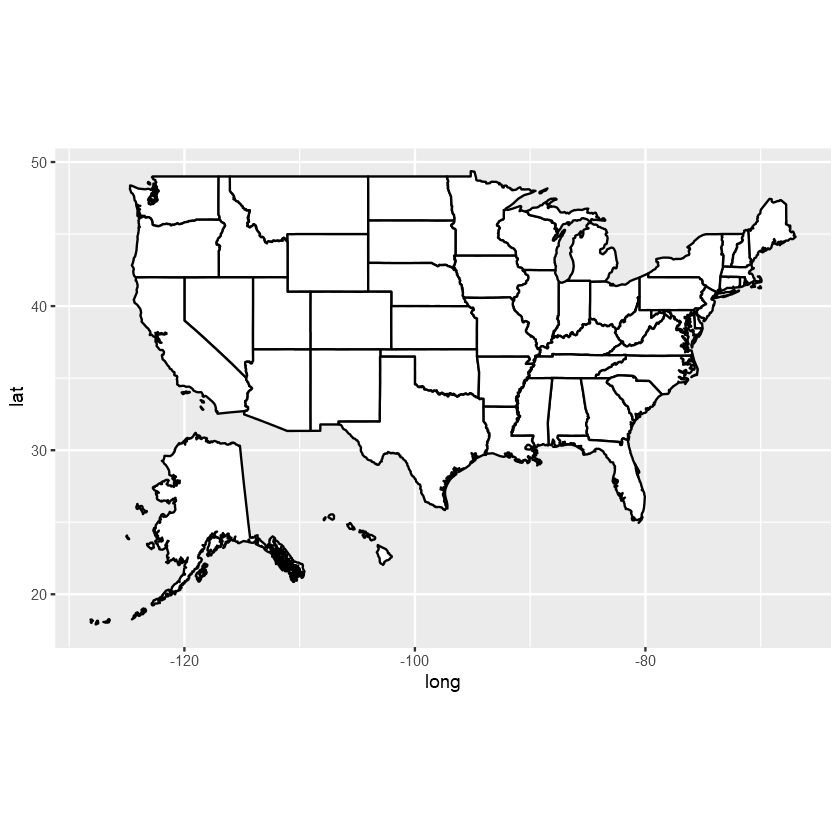

In [35]:
simple_map = 


<span style="color:red"><b>Another note on the 'states_spdf' object</span>.</b>

While we can use this to create a simple map of the United States, we can convert the SpatialPolygonsDataFrame object into a simple data.frame class by using the code below. 

In [36]:
### fortify is a function in ggplot2 which transforms the information in the
### SpatialPolygonsDataFrame object into a simple data frame
states_fortified = 

### notice how this new data frame does not contain much information
### it only contains information on how to draw the polygons
### we will now merge the data from 'states_spdf' with the new data frame

Regions defined for each Polygons


long,lat,order,hole,piece,id,group
-122.4020,48.22522,1,FALSE,1,0,0.1
-122.4629,48.22836,2,FALSE,1,0,0.1
-122.4544,48.12849,3,FALSE,1,0,0.1
-122.3613,48.06010,4,FALSE,1,0,0.1
-122.5145,48.13397,5,FALSE,1,0,0.1
-122.5421,48.21046,6,FALSE,1,0,0.1


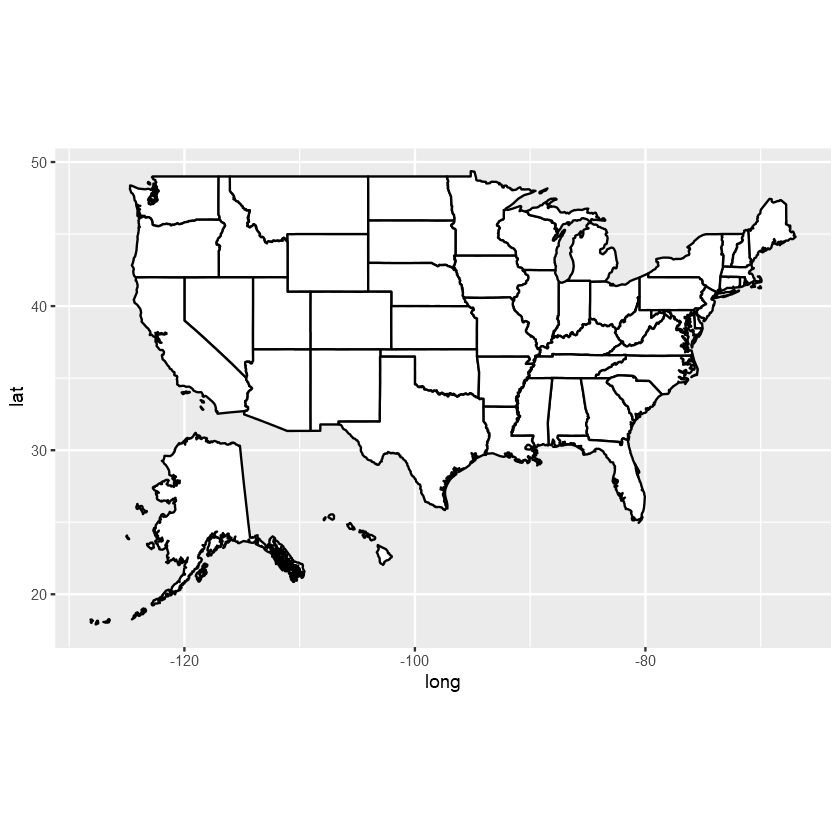

In [39]:
fortified_map = 


In [40]:
### merging of data
### here we use the reference column "id" which we created earlier
### to match the correct rows
states_map = merge(...)

head(states_map)

id,long,lat,order,hole,piece,group,STATE_FIPS,STATE_NAME,DRAWSEQ,...,income_per_capita,pop_wo_healthcare,percent_minority,top_half_minority,percent_bachelors,top_half_edu,percent_healthcare,top_half_healthcare,cases_per_100000,deaths_per_100000
0,-122.4020,48.22522,1,FALSE,1,0.1,53,Washington,2,...,38915,457854,24.62119,1,36.02014,1,93.81622,1,9596.984,114.4635
0,-122.4629,48.22836,2,FALSE,1,0.1,53,Washington,2,...,38915,457854,24.62119,1,36.02014,1,93.81622,1,9596.984,114.4635
0,-122.4544,48.12849,3,FALSE,1,0.1,53,Washington,2,...,38915,457854,24.62119,1,36.02014,1,93.81622,1,9596.984,114.4635
0,-122.3613,48.06010,4,FALSE,1,0.1,53,Washington,2,...,38915,457854,24.62119,1,36.02014,1,93.81622,1,9596.984,114.4635
0,-122.5145,48.13397,5,FALSE,1,0.1,53,Washington,2,...,38915,457854,24.62119,1,36.02014,1,93.81622,1,9596.984,114.4635
0,-122.5421,48.21046,6,FALSE,1,0.1,53,Washington,2,...,38915,457854,24.62119,1,36.02014,1,93.81622,1,9596.984,114.4635


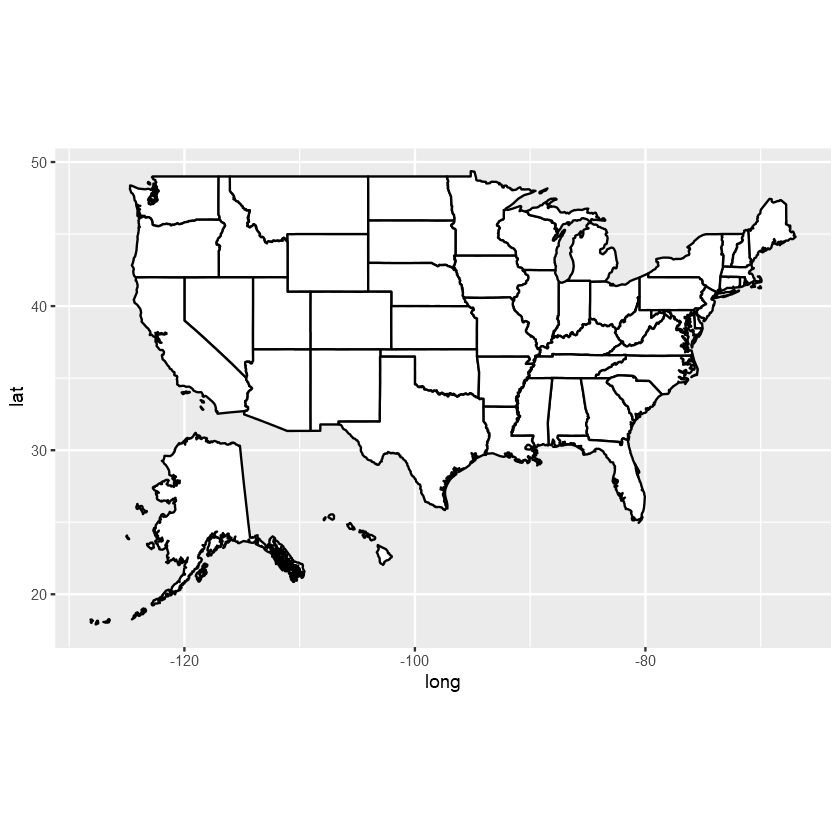

In [41]:
### we can repeat the steps earlier with our new object to map out the USA
### the only piece of code that needs to change is the data which we are feeding it
ggplot(data = states_map) + 
geom_polygon(aes(x = long, y = lat, group = group), fill='white', color = "black") + 
coord_fixed(1.25)

#### Changing the map to show COVID infections per 100,000 of population

To show how COVID rates per 100,000 people look like in the US, we will change the 'fill' parameter in aes(). Because we want make the color of the fill a function of cases_per_1000000, we will reference that variable. In ggplot2 there are a lot of prebuilt themes and palettes one can choose from. scale_fill_distiller() is for continuous variables that define fill.

* Data: states_map
* Variables: long, lat, group, cases_per_100000

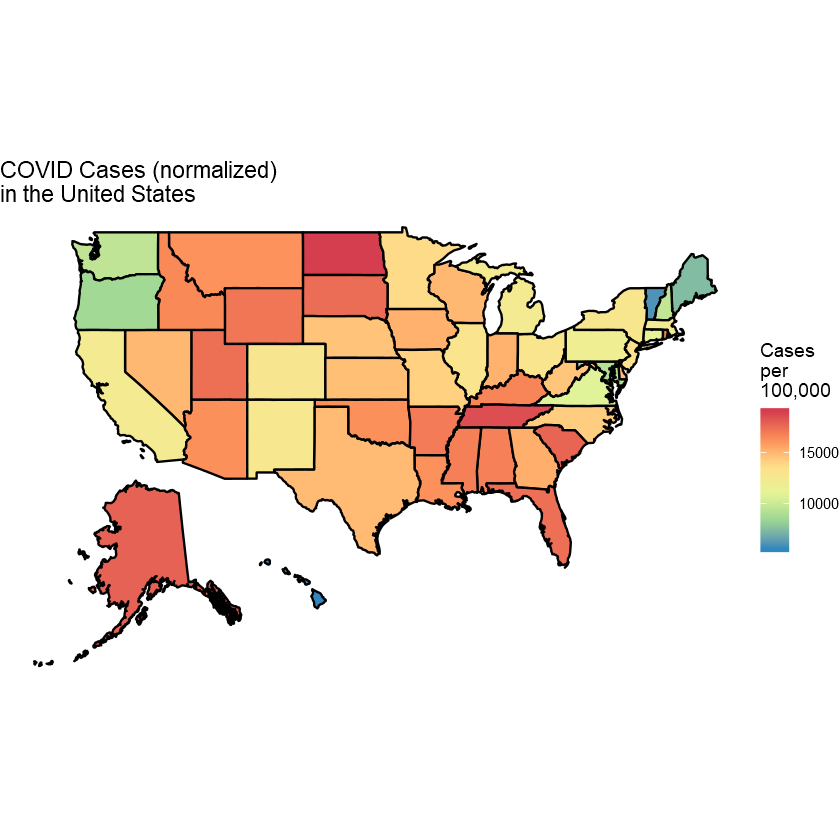

In [42]:
### we can repeat the steps earlier with our new object to map out the USA
### the only piece of code that needs to change is the data which we are feeding it
map_covid = 


#### Lets spatially map out education in the United States

In [43]:
names(states_map)

[1] "id"                  "long"                "lat"                
 [4] "order"               "hole"                "piece"              
 [7] "group"               "STATE_FIPS"          "STATE_NAME"         
[10] "DRAWSEQ"             "SUB_REGION"          "STATE_ABBR"         
[13] "state"               "cases"               "deaths"             
[16] "pop_total"           "pop_white"           "edu_total"          
[19] "edu_hs"              "edu_ged"             "edu_bachelors"      
[22] "edu_masters"         "edu_profschool"      "edu_phd"            
[25] "income_per_capita"   "pop_wo_healthcare"   "percent_minority"   
[28] "top_half_minority"   "percent_bachelors"   "top_half_edu"       
[31] "percent_healthcare"  "top_half_healthcare" "cases_per_100000"   
[34] "deaths_per_100000"

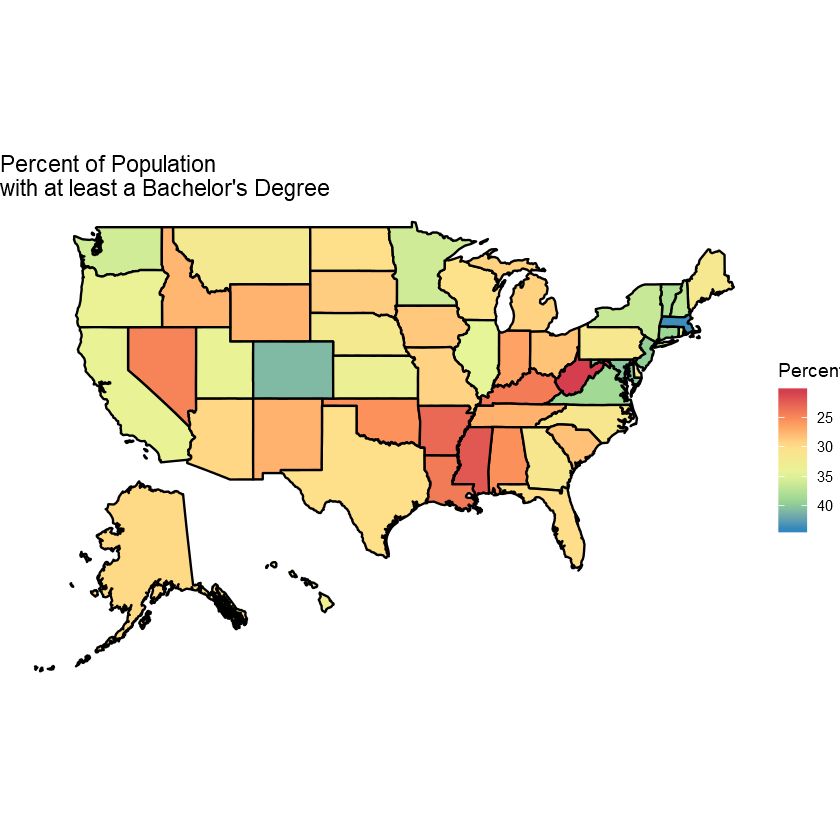

In [44]:
### taking care of the outlier
states_map$percent_bachelors[which(states_map$percent_bachelors > 50)] = 44

map_edu = 

#### Let's combine some of our plots together!

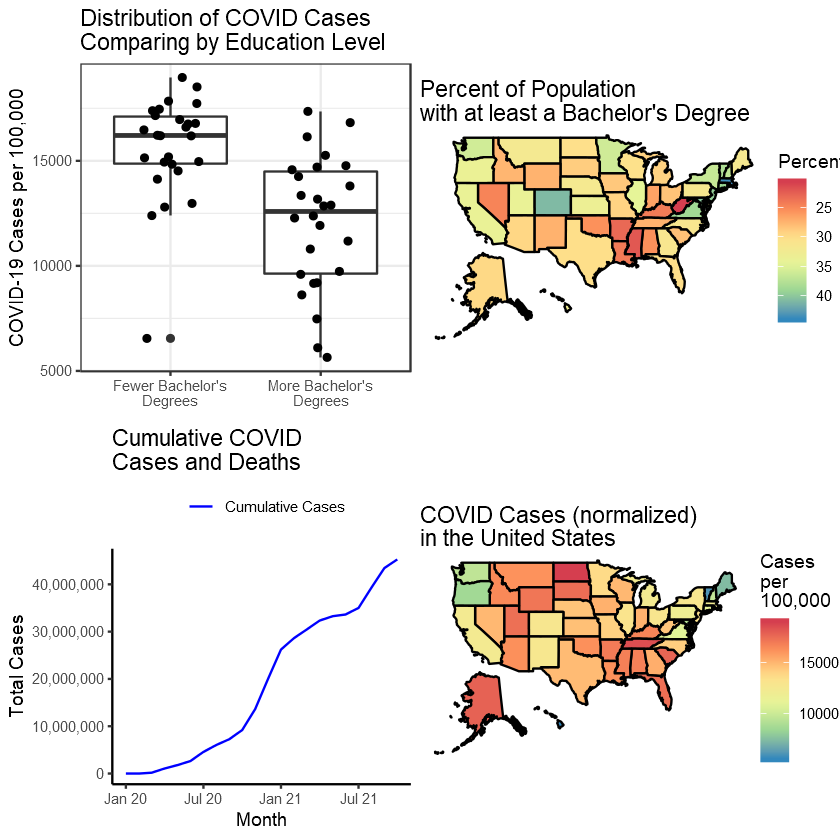

In [45]:
ggarrange(box_edu, map_edu, cases_over_time, map_covid, ncol = 2, nrow = 2)

## Animating the spatial plots for COVID cases over time

For the sake of time, I've went ahead and created the data frame which we will be using to create our animated map showing COVID cases through time. I've included the code I need to get that data. You can skip it and just load the file I've written myself.

####  The actual plotting

When we are animating our plots, we are essentially telling R to create gif using multiple plots in a flipbook. The only difference between plotting a single map and making an animation is the reference data and a line of code indicating which variable tracks the sequence of frames. We will first define our map, then in later code we will animate and save it as a gif. You must have the package 'gifski' installed to do this.

* Data: states_map_bymonth
* Variables: lat, long, group, cases_per_100000, months_after_jan20

In [48]:
setwd("G:/My Drive/Desktop Laptop Shared Files/ggplot2 seminar/data_files/processed_data")
states_map_bymonth = read.csv("states_map_bymonth.csv")

In [49]:
map_covid_bymonth = 


In [50]:
setwd("C:/Users/Jason/Desktop")

### this is how we animate it, it basically takes a bunch of plots and puts them together into a gif
### we must have the package 'gifski' to


### fin

Code written by: Jason Malinay Soria <br>
Date: 2021-10-25